<a href="https://colab.research.google.com/github/shabbab01/docs/blob/main/HW4ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW 4 XGBoost, first, we have to load the dataset from kaggle**  

In [49]:
# Import necessary lib
import numpy as np
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline

**Question 1: Load the liver patient dataset and print it.Show the description of dataset and plot the 
correlation using Heatmap. Check for Nan & Null values and fill them with mean values. 
Drop the duplicate values from the dataset.**

In [50]:
# dataset
da = pd.read_csv('/content/indian_liver_patient.csv')

In [52]:
# Print the whole dataset
da.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [54]:
# dataset information
print(da.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [56]:
# Checking for null data
print(da.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [60]:
da

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


there are 4 data are missing, so we have to replace them the mean of that column, Albumin_and_Globulin_Ratio    4

In [59]:
# Check for Nan values
#print(da.isnull().values.any())
#check if there is a null dataset
print(da.isnull().count)

<bound method DataFrame.count of        Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0    False   False            False             False                 False   
1    False   False            False             False                 False   
2    False   False            False             False                 False   
3    False   False            False             False                 False   
4    False   False            False             False                 False   
..     ...     ...              ...               ...                   ...   
578  False   False            False             False                 False   
579  False   False            False             False                 False   
580  False   False            False             False                 False   
581  False   False            False             False                 False   
582  False   False            False             False                 False   

     Alamine_Amino

In [62]:
# change null values with means  
da['Albumin_and_Globulin_Ratio'].fillna(int(da['Albumin_and_Globulin_Ratio'].mean()), inplace=True)
print(da)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [65]:
# check if there is a null vlaues 
da.isnull().sum()
print(da.isnull().count)

<bound method DataFrame.count of        Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0    False   False            False             False                 False   
1    False   False            False             False                 False   
2    False   False            False             False                 False   
3    False   False            False             False                 False   
4    False   False            False             False                 False   
..     ...     ...              ...               ...                   ...   
578  False   False            False             False                 False   
579  False   False            False             False                 False   
580  False   False            False             False                 False   
581  False   False            False             False                 False   
582  False   False            False             False                 False   

     Alamine_Amino

for each 4 null values, they fill it by mean 

In [67]:
# check for the none values, if it is false which mean that dataset which we have is complete and there is no null values 
print(da.isnull().values.any())

False


In [70]:
# drop douplicate values 
da.drop_duplicates()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


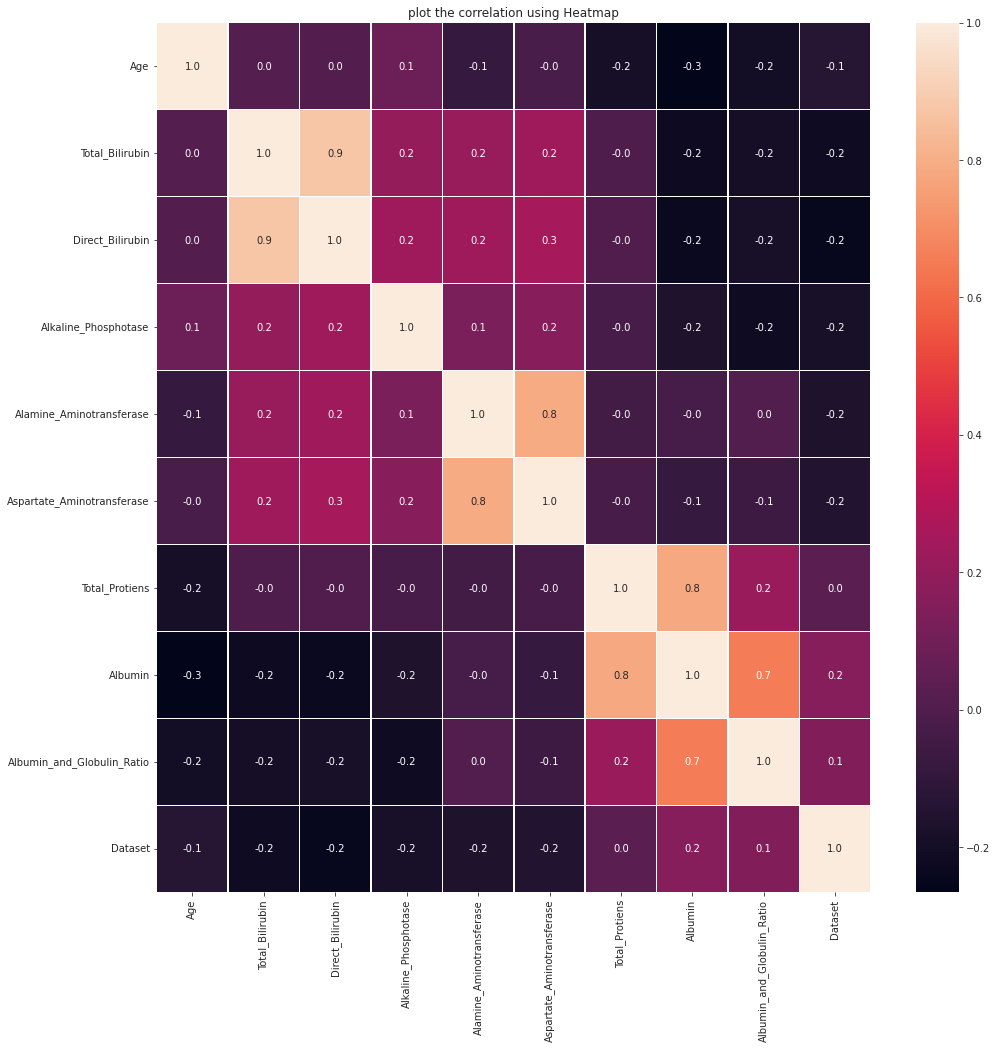

In [72]:
#plot the correlation using Heatmap
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(da.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
corr = da[da.columns].corr()
plt.title('plot the correlation using Heatmap')
plt.show()

**Plot pairwise relationship using pairplot (kind= ‘reg’).**

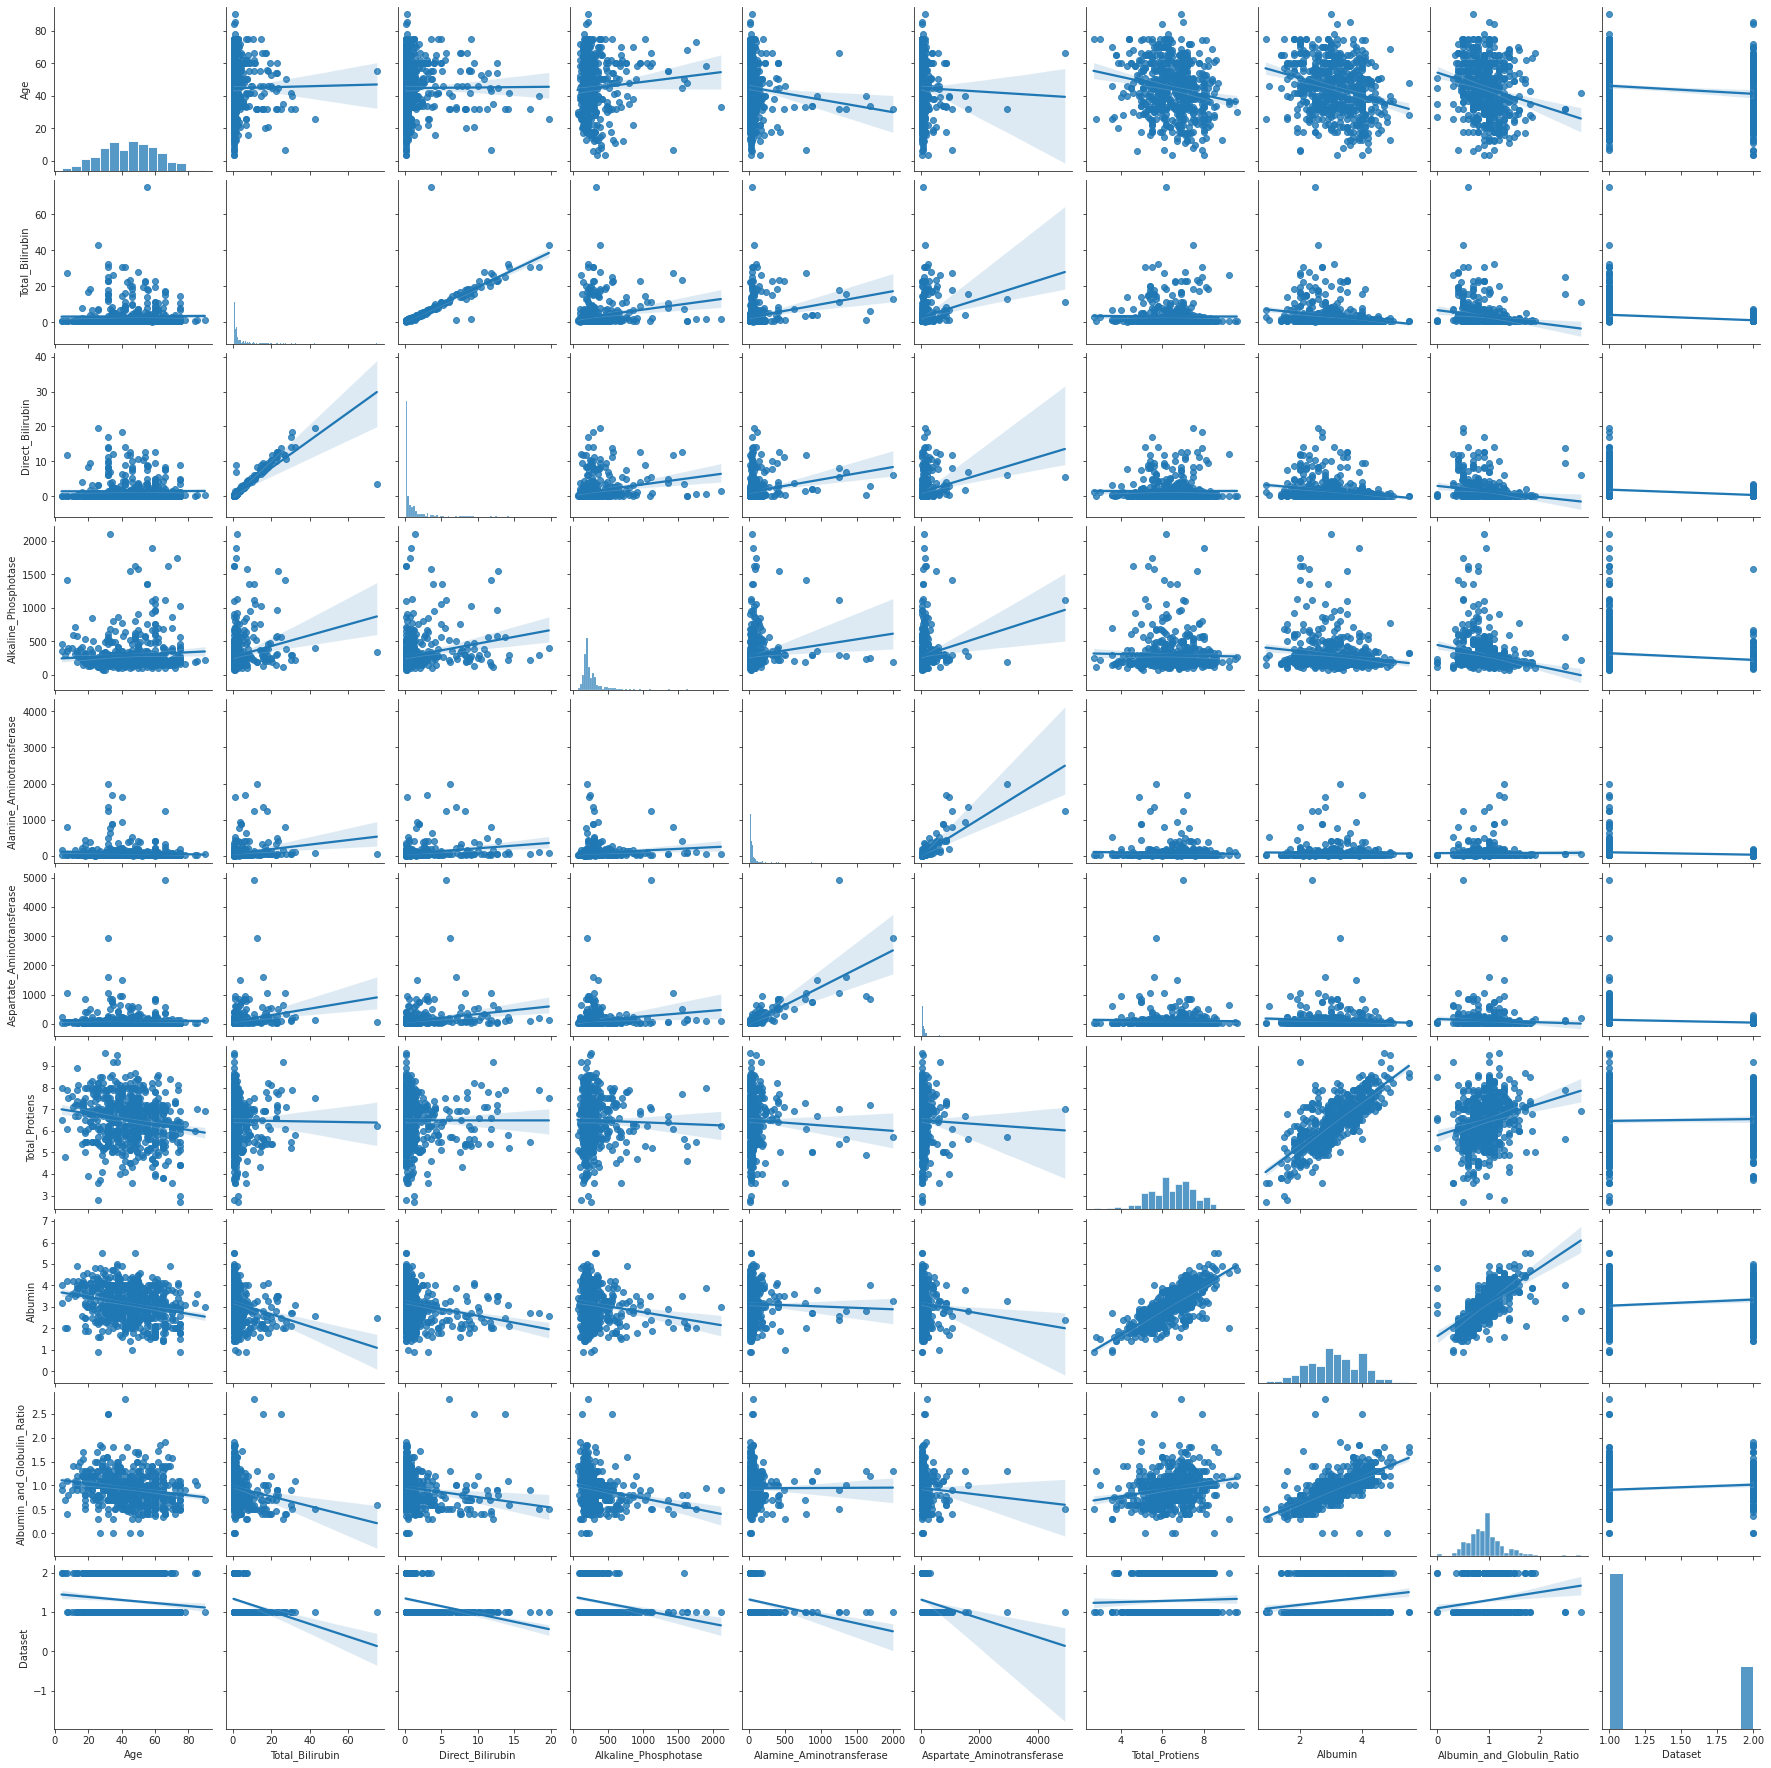

In [73]:
#  call seaborn and  plot the visualization  as follows, 
sns.set_style('ticks')
sns.pairplot(da,kind='reg')
plt.show()

**Apply label encoding to dataset and check if the dataset is balanced or not using 
distribution plots to all the input features. If the dataset is imbalanced use SMOTE analysis 
to balance the dataset.**

***encode the label of gender and transform it to 1 or 0 based on the type of gender, male =1 and female=0***

In [77]:
#***encode the label of gender and transform it to 1 or 0 based on the type of gender, male =1 and female=0
from sklearn.preprocessing import LabelEncoder, RobustScaler
le = LabelEncoder()
da['Gender'] = le.fit_transform(da['Gender'])
da.Gender.head(10)

0    0
1    1
2    1
3    1
4    1
5    1
6    0
7    0
8    1
9    1
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

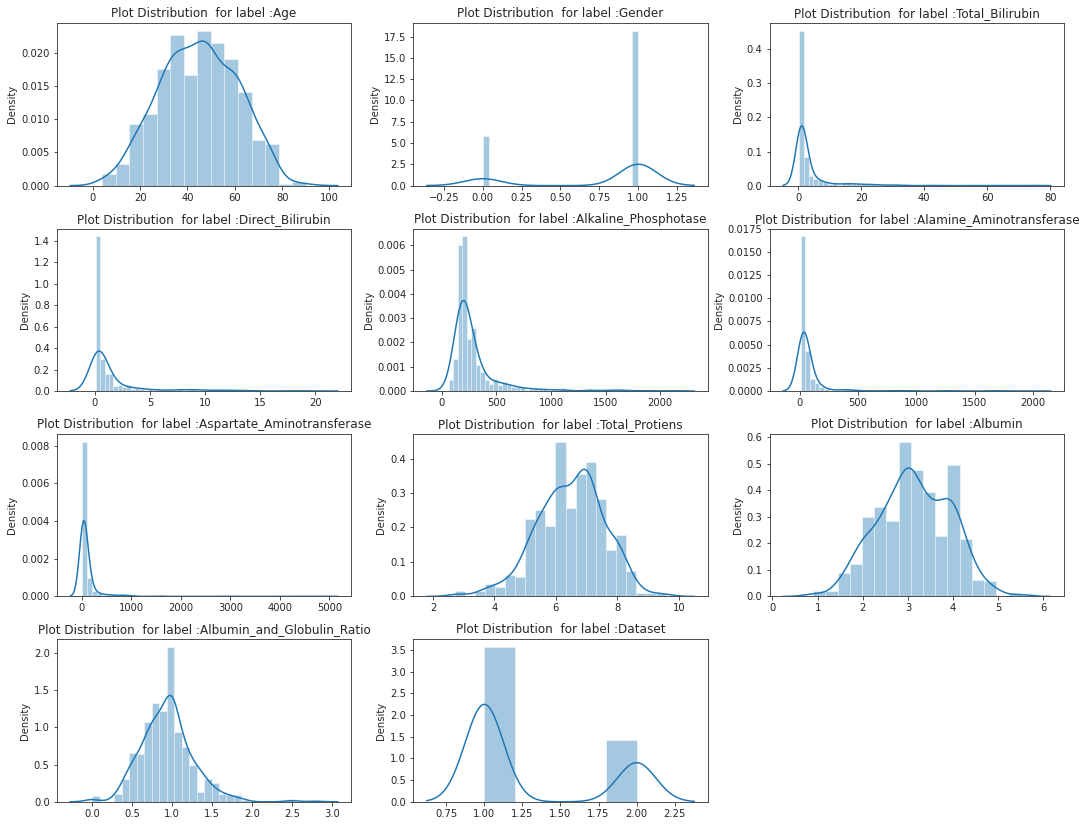

In [79]:
#  check of the data is balance or not 
#https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/ as a reference 
#https://seaborn.pydata.org/tutorial/distributions.html. as a reference 
plt.figure(figsize=(15, 14))

for i, c in enumerate(da.select_dtypes(include='number').columns):
  plt.subplot(5,3,i+1)
  sns.distplot(da[c])
  plt.title('Plot Distribution  for label :' + c)
  plt.xlabel('')
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

 

the plots show that the data is not balance and there is overlap between some values and some label we would say that is balanced. As we can see the gender is not balance  whereas age  of male is more than of gender of female,  consider as balance dataset, in this case, we have to use the somte function to create and inciate some values of label of the gender of female.  

In [80]:
# reshapping the dataset based on the coloum type
r = RobustScaler()
for c in da[['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Albumin_and_Globulin_Ratio','Dataset']].columns:
    da[c] = r.fit_transform(da[c].values.reshape(-1, 1))
da.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.80,-1.0,-0.166667,0.1,-0.171429,-0.506667,18,6.8,3.3,-0.050,0.0
1,0.68,0.0,5.500000,5.5,4.008163,0.773333,100,7.5,3.2,-0.450,0.0
2,0.68,0.0,3.500000,4.1,2.302041,0.666667,68,7.0,3.3,-0.075,0.0
3,0.52,0.0,0.000000,0.4,-0.212245,-0.560000,20,6.8,3.4,0.200,0.0
4,1.08,0.0,1.611111,2.0,-0.106122,-0.213333,59,7.3,2.4,-1.300,0.0


In [82]:
# balance the dataset by droping the Gender and Dataset
X_= da.drop(['Gender', 'Dataset'], axis='columns')
X_.head(10)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.80,-0.166667,0.1,-0.171429,-0.506667,18,6.8,3.3,-0.050
1,0.68,5.500000,5.5,4.008163,0.773333,100,7.5,3.2,-0.450
2,0.68,3.500000,4.1,2.302041,0.666667,68,7.0,3.3,-0.075
3,0.52,0.000000,0.4,-0.212245,-0.560000,20,6.8,3.4,0.200
4,1.08,1.611111,2.0,-0.106122,-0.213333,59,7.3,2.4,-1.300
5,0.04,0.444444,0.7,0.000000,-0.426667,14,7.6,4.4,0.950
6,-0.76,-0.055556,0.2,-0.440816,-0.506667,12,7.0,3.5,0.200
7,-0.64,-0.055556,0.3,-0.048980,-0.560000,11,6.7,3.6,0.450
8,-1.12,-0.055556,0.3,-0.048980,-0.346667,19,7.4,4.1,0.700
9,0.40,-0.166667,0.2,0.669388,0.480000,58,6.8,3.4,0.200


In [83]:
X_.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,-0.010154,1.277111,1.486106,0.674092,1.219028,109.910806,6.483190,3.141852,0.051415
std,0.647593,3.449734,2.808498,1.983167,4.869876,288.918529,1.085451,0.795519,0.819906
min,-1.640000,-0.333333,0.100000,-1.183673,-0.666667,10.000000,2.700000,0.900000,-2.300000
25%,-0.480000,-0.111111,0.200000,-0.265306,-0.320000,25.000000,5.800000,2.600000,-0.550000
50%,0.000000,0.000000,0.300000,0.000000,0.000000,42.000000,6.600000,3.100000,0.000000
75%,0.520000,0.888889,1.300000,0.734694,0.680000,87.000000,7.200000,3.800000,0.450000
max,1.800000,41.111111,19.700000,15.526531,52.400000,4929.000000,9.600000,5.500000,4.700000


In [84]:
y = da['Dataset']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
578    1.0
579    0.0
580    0.0
581    0.0
582    1.0
Name: Dataset, Length: 583, dtype: float64

In [86]:
# in this stage, we have to use the somte function   to create  and  balance the dataset.
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X, y)

data_= pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
data_

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.800000,-0.166667,0.100000,-0.171429,-0.506667,18,6.800000,3.300000,-0.050000,0.0
1,0.680000,5.500000,5.500000,4.008163,0.773333,100,7.500000,3.200000,-0.450000,0.0
2,0.680000,3.500000,4.100000,2.302041,0.666667,68,7.000000,3.300000,-0.075000,0.0
3,0.520000,0.000000,0.400000,-0.212245,-0.560000,20,6.800000,3.400000,0.200000,0.0
4,1.080000,1.611111,2.000000,-0.106122,-0.213333,59,7.300000,2.400000,-1.300000,0.0
...,...,...,...,...,...,...,...,...,...,...
827,0.539271,-0.124494,0.200000,-0.246270,-0.086424,25,7.910928,4.183196,0.389777,1.0
828,0.684308,-0.014283,0.293573,-0.048980,-0.263995,13,5.351419,2.625709,-0.050000,1.0
829,-0.542579,0.669242,0.787701,-0.391837,1.001720,122,5.358467,2.982056,0.641028,1.0
830,-0.397704,-0.081388,0.226751,0.172056,0.540467,97,7.239494,4.192996,1.464324,1.0


**split the dataset and apply XGboost algorithm to train a model. Print accuracy, 
classification report and plot confusion matrix and AUC_ROC curve.**

In [87]:
# By splitting our dataset as follows,
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Now we will apply XGboost algorithm to train our model as follows,
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
# Import the required libraries as follows,
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
import xgboost as xgb
import numpy as np
from xgboost import XGBClassifier

In [90]:
xgbc = XGBClassifier()
print(xgbc)

XGBClassifier()


In [91]:
xgbc.fit(X_train,y_train)

XGBClassifier()

In [92]:
y_pred = xgbc.predict(X_test)

In [93]:
#  accuracy 
print("Accuracy of Model::",accuracy_score(y_test,y_pred))

Accuracy of Model:: 0.7425149700598802


In [94]:
#  classifications report  
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.72      0.72        75
         1.0       0.77      0.76      0.77        92

    accuracy                           0.74       167
   macro avg       0.74      0.74      0.74       167
weighted avg       0.74      0.74      0.74       167



In [117]:
def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    sns.set(font_scale=1.5)
    ax = sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    plt.show()
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.close()

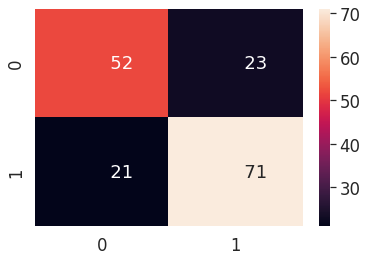

In [120]:
# confusion matrix using heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='9.0f')

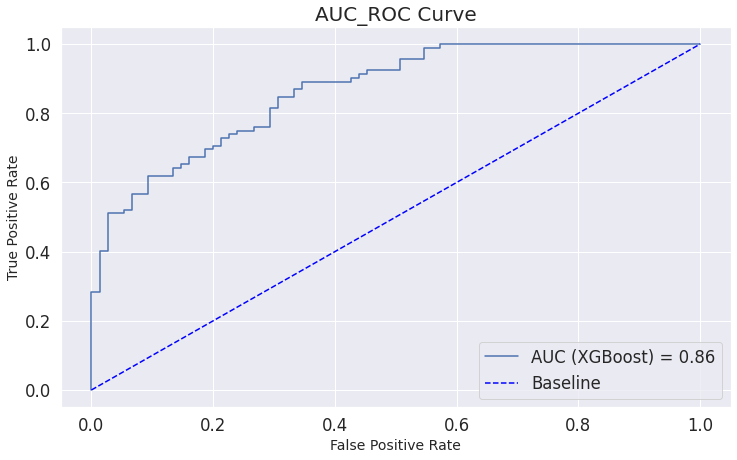

In [122]:
# Plot  AUC_ROC curve ,
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

model_xg_ = XGBClassifier().fit(X_train, y_train)
prob_xg_ = model_xg_.predict_proba(X_test)[:, 1]

auc_xg = roc_auc_score(y_test, prob_xg)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, prob_xg)

plt.figure(figsize=(12, 7))
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('AUC_ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()

**Perform parameter tuning using GridsearchCV with below mentioned constraints and print 
the best parameters & print scores to all the parameters & repeat Task-4. 
a. Learning rate: [1,0.5,0.1,0.01,0.001] 
b.  Max depth: [3,5,10,20] 
c. N estimators: [10,20,50,100,200]**

In [102]:
#   Gridsearch by using hyperparameter  
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [103]:
estimator = XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)

In [123]:
parameters = {'Learning rate': [1,0.5,0.1,0.01,0.001],
               'Max depth': [3,5,10,20],
               'N estimators': [10,20,50,100,200]}

In [124]:
grid_search = GridSearchCV(estimator= estimator, param_grid= parameters, scoring = 'roc_auc', n_jobs = 10, cv = 10, verbose=True)

In [125]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
             param_grid={'Learning rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'Max depth': [3, 5, 10, 20],
                         'N estimators': [10, 20, 50, 100, 200]},
             scoring='roc_auc', verbose=True)

In [107]:
grid_search.best_estimator_

XGBClassifier(Learning rate=1, Max depth=3, N estimators=10, nthread=4, seed=42)

In [108]:
# To find the best parameters,
print('Best parameter:', grid_search.best_params_)

Best parameter: {'Learning rate': 1, 'Max depth': 3, 'N estimators': 10}


In [127]:
# Print the scores of all parameters,
allscores_=grid_search.cv_results_['mean_test_score']
allscores_

array([0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702787,
       0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702787,
       0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702787,
       0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702787,
       0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702787,
       0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702787,
       0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702787,
       0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702787,
       0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702787,
       0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702787,
       0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702787,
       0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702787,
       0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702787,
       0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702787,
       0.84702787, 0.84702787, 0.84702787, 0.84702787, 0.84702

In [128]:
# To find the best score,
print('Best score :', grid_search.best_score_)

Best score : 0.847027867965368


In [111]:
 # Now repeat Task 4 and train our model again with the best parameters as follows,
xgbc = xgb.XGBClassifier(learning_rate= 1, max_depth= 3, n_estimators= 10)
xgbc.fit(X_train,y_train)

XGBClassifier(learning_rate=1, n_estimators=10)

In [112]:
y_pred = xgbc.predict(X_test)

In [129]:
# Print the accuracy as follows,
print(" Accuracy of Model : ",accuracy_score(y_test,y_pred))

 Accuracy of Model :  0.7365269461077845


In [130]:
# classification report as follows,
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        75
         1.0       0.76      0.77      0.76        92

    accuracy                           0.74       167
   macro avg       0.73      0.73      0.73       167
weighted avg       0.74      0.74      0.74       167



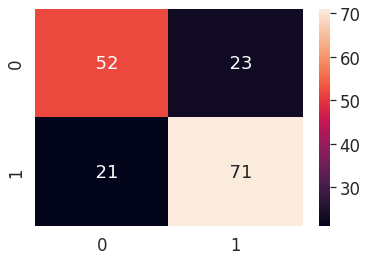

In [132]:
# Confusion Matrix using heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='4.0f')

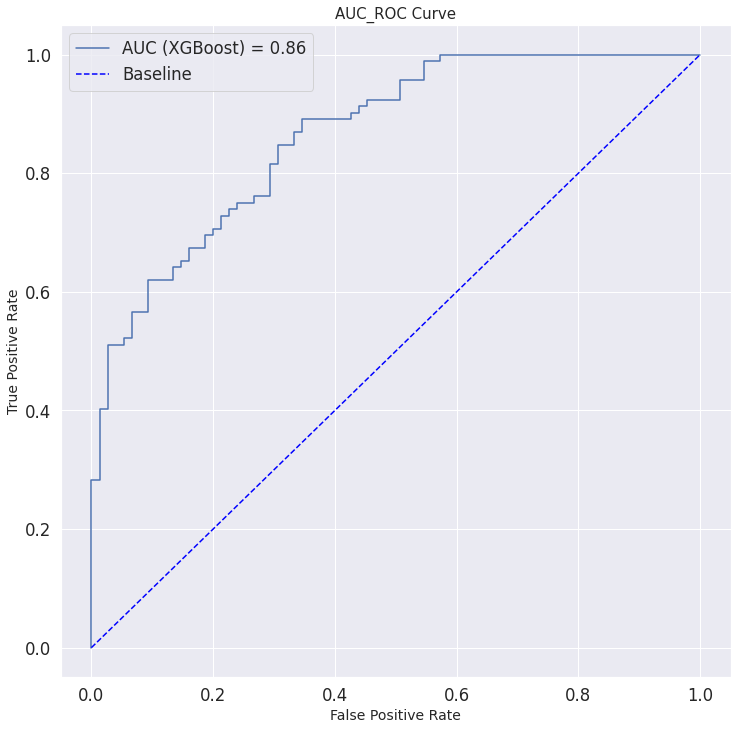

In [136]:
#   AUC_ROC Curve  ,
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

model_xg = XGBClassifier().fit(X_train, y_train)
prob_xg = model_xg.predict_proba(X_test)[:, 1]

auc_xg = roc_auc_score(y_test, prob_xg)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, prob_xg)

plt.figure(figsize=(12, 12))
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('AUC_ROC Curve', size=15)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()

#Reference

https://xgboost.readthedocs.io/en/stable/python/python_api.html

https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/data


https://www.anyscale.com/blog/how-to-tune-hyperparameters-on-xgboost


https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook

https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663